In [2]:
random_seed_cmb = 1
random_seed_cmb = 1
nside = 4
r = 0.01;

In [3]:
#freq_band = [40, 50, 100, 140, 280, 402]
freq_band = [40, 100, 140]
which_model = "s1";

In [4]:
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/main_function.jl")

Using CAMB 1.5.2 installed at /Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/camb


r_like_estimate (generic function with 1 method)

In [15]:
num_iterations = 2
@time r_array, beta_array, optimum_r, optimum_beta_s= r_like_estimate(0.001, -3, num_iterations, random_seed_cmb, random_seed_cmb, nside, r, freq_band, which_model, 140);

 19.552443 seconds (27.11 M allocations: 6.062 GiB, 2.74% gc time, 3.73% compilation time)


In [16]:
optimum_r

0.011357916998578594

In [8]:
using NPZ

@time cov_mat_scal = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/covariance_matrix/cov_mat_scal.npy")
@time cov_mat_tens = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/covariance_matrix/cov_mat_tens.npy");

  0.069827 seconds (152.02 k allocations: 12.458 MiB, 17.64% gc time, 95.51% compilation time)
  0.001119 seconds (48 allocations: 2.254 MiB)


In [17]:
num_iterations = 2
@time r_array, beta_array, optimum_r, optimum_beta_s = r_like_estimate_fast(0.001, 2, 1, 1, nside, r, freq_band, which_model, 140, cov_mat_scal, cov_mat_tens);

  0.420603 seconds (45.54 k allocations: 618.928 MiB, 5.02% gc time)


In [18]:
optimum_r

0.011357916998578594

In [25]:
using PyPlot

#PyPlot.plot(1:num_iterations, r_array)
#PyPlot.grid()
#PyPlot.ylim(0.007753, 0.0077575);

In [26]:
#PyPlot.plot(1:num_iterations, beta_array)
#PyPlot.grid()
#PyPlot.ylim(-3.00875, -3.0092);

In [4]:
r_optimum_array = []

@time for seed in 1:100

    #num_iterations = 2
    r_array, beta_array, optimum_r, optimum_beta_s = r_like_estimate(0.001, -3, 2, seed, seed, nside, r, freq_band, which_model, 140);
    push!(r_optimum_array, optimum_r)
    println(seed)

end

2409.502862 seconds (2.63 G allocations: 594.535 GiB, 1.91% gc time, 0.43% compilation time: <1% of which was recompilation)


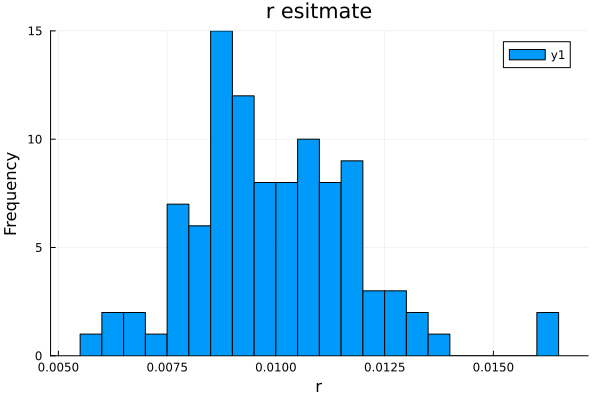

In [10]:
using Plots

histogram(r_optimum_array, bins = 20, xlabel = "r", ylabel = "Frequency", title = "r esitmate", label = false)

In [5]:
using NPZ

@time cov_mat_scal = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/covariance_matrix/cov_mat_scal.npy")
@time cov_mat_tens = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/covariance_matrix/cov_mat_tens.npy");

  0.064814 seconds (155.17 k allocations: 12.724 MiB, 96.08% compilation time)
  0.001177 seconds (48 allocations: 2.254 MiB)


In [10]:
r_optimum_array = []

accuracy_r, accuracy_like = 1e-5, 1e-2

@time for seed in 1:10

    # r_like_estimate_fast(r_ini, num_iterations, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens)
    r_array, beta_array, optimum_r, optimum_beta_s = r_like_estimate_fast(0.001, 20, accuracy_r, accuracy_like, seed, seed, nside, r, freq_band, which_model, 140, cov_mat_scal, cov_mat_tens);
    push!(r_optimum_array, optimum_r)
    print(seed)

end

12345678910  2.463842 seconds (410.59 k allocations: 5.391 GiB, 3.67% gc time)


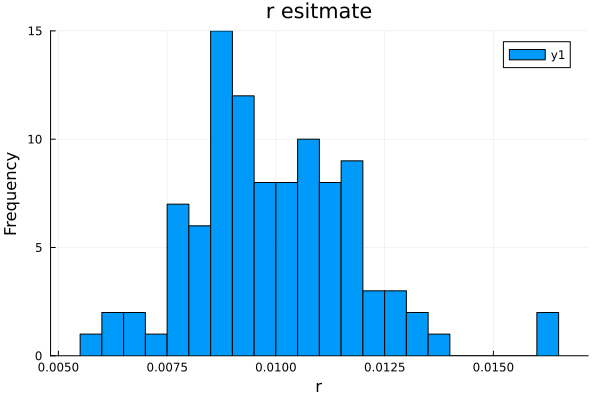

In [36]:
using Plots

histogram(r_optimum_array, bins = 20, xlabel = "r", ylabel = "Frequency", title = "r esitmate", label = false)

In [29]:
# スレッドセーフな計算 push!は使うな

times = 10

r_optimum_array = zeros(times)

@time @inbounds @threads for seed in 1:times

    # r_like_estimate_fast(r_ini, num_iterations, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens)
    r_array, beta_array, optimum_r, optimum_beta_s = r_like_estimate_fast(0.001, 20, seed, seed, nside, r, freq_band, which_model, 140, cov_mat_scal, cov_mat_tens);
    r_optimum_array[seed] = optimum_r
    
    print(seed)

end

74915102836  4.160830 seconds (992.71 k allocations: 12.667 GiB, 3.49% gc time, 1.89% compilation time)


In [1]:
r_array

LoadError: UndefVarError: `r_array` not defined

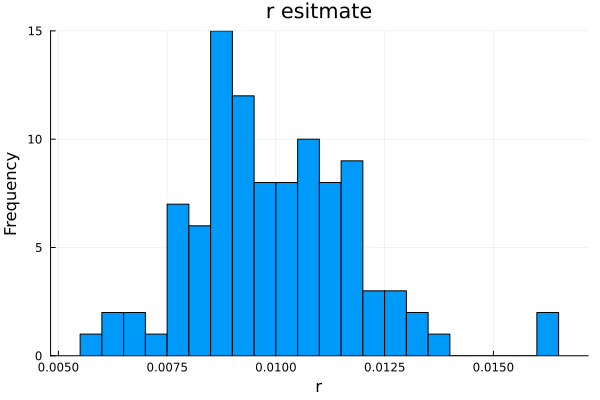

In [25]:
using Plots

histogram(r_optimum_array, bins = 20, xlabel = "r", ylabel = "Frequency", title = "r esitmate", label = false)

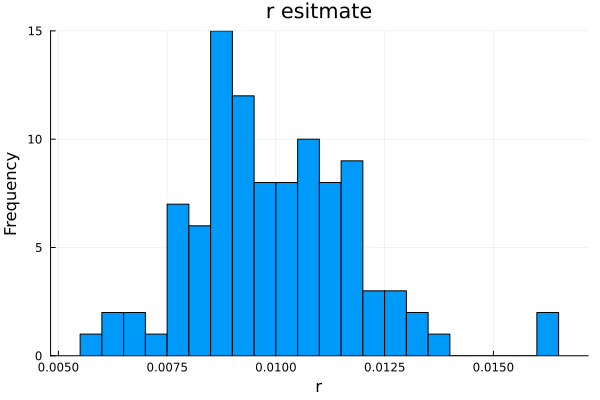

In [16]:
using Plots

histogram(r_optimum_array, bins = 20, xlabel = "r", ylabel = "Frequency", title = "r esitmate", label = false)